This is the notebook for comparing the voronoi test results from the different environmental conditions.

In [3]:
import graph_create, voronoi_local, jaccard_similarity

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# from shapely.geometry import Polygon 
from scipy.spatial import Voronoi
import scipy as sp
import scipy.stats as stats


In [4]:
def get_directory(condition):
    dot_folder = f'environmental/dot_images/{condition}_dots'
    vein_folder = f'environmental/vein_graphs/{condition}_txt'
    samples_csv =  f'environmental/{condition}_samples.csv' 
    samples = pd.read_csv(samples_csv, delimiter=',', header = None ).values.tolist()
    samples = [item[0] for item in samples]
 
    return dot_folder, vein_folder, samples

-----
## Local test:

In [5]:
def test_for_condition(condition = 'control'):
    
    condition_local_summary = np.zeros((20, 4))

    dot_folder, vein_folder, samples = get_directory(condition)
    for i, sample in enumerate(samples):
        G = graph_create.graph_creation(sample, dot_folder= dot_folder, vein_folder= vein_folder)

        adj_faces_mat, shared_edges_mat = voronoi_local.shared_edges(G, threshold = 50)
        rst = voronoi_local.local_test(adj_faces_mat, shared_edges_mat,G.graph['dots_passed'], G, dot_bool = True)
        condition_local_summary[i] = rst[2].iloc[0].values


    columns = ['mean angle error','std angle error', 'mean distance error',	'std distance error']

    condition_local_summary = pd.DataFrame(condition_local_summary, index  = samples, columns = columns)

    return condition_local_summary 

In [6]:
control_local = test_for_condition(condition ='control')
natural_local = test_for_condition(condition ='natural')
shade_local = test_for_condition(condition ='shade')
heat_local = test_for_condition(condition ='heat')

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Ste

/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:82: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])


- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed

In [7]:
test_summary = np.zeros((4,4))

In [8]:
test_summary[0] = control_local.describe().iloc[1].values
test_summary[1] = natural_local.describe().iloc[1].values
test_summary[2] = shade_local.describe().iloc[1].values
test_summary[3] = heat_local.describe().iloc[1].values

In [9]:
control_local['condition'] = 'control'
natural_local['condition'] = 'natural'
shade_local['condition'] = 'shade'
heat_local['condition'] = 'heat'
local_df = pd.concat([control_local, natural_local, shade_local, heat_local])
local_df.reset_index(level=0, inplace=True)
local_df

,index,mean angle error,std angle error,mean distance error,std distance error,condition
0,C1-1,10.060697,7.227324,0.249191,0.174322,control
1,C1-2,9.646874,7.879138,0.224596,0.200808,control
2,C1-3,9.722104,8.312172,0.242157,0.191260,control
3,C1-4,9.112837,6.314324,0.194321,0.206590,control
4,C1-5,9.651382,5.955274,0.242173,0.196658,control
...,...,...,...,...,...,...
75,H6-1,5.770859,3.574251,0.161364,0.162959,heat
76,H6-3,6.682146,5.918883,0.252913,0.229872,heat
77,H6-4,9.484430,8.842002,0.219654,0.190126,heat
78,H6-5,6.504824,5.871086,0.212277,0.169882,heat


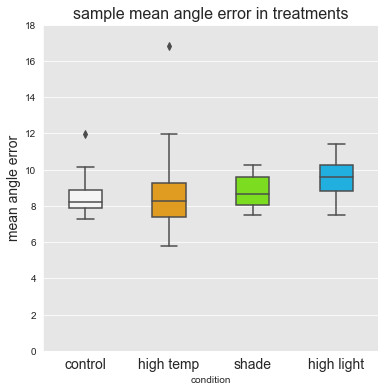

In [11]:
colors = ['whitesmoke', 'orange', 'lawngreen', 'deepskyblue']
order = ['natural', 'heat',  'shade', 'control']
x = "condition"
y = "mean angle error"
sns.set_palette(sns.color_palette(colors))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

fig, ax = plt.subplots(figsize = (6,6))

ax = sns.boxplot (x = x, y = y, data = local_df, order = order, width = .4)

ax.set_title('sample mean angle error in treatments', fontsize = 16)


ax.set_ylim(0, 18)
ax.set_ylabel('mean angle error', fontsize = 14)

ax.set_xticklabels(['control','high temp','shade','high light'], fontsize = 14)



plt.show()
# fig.savefig('mean_angle.pdf')


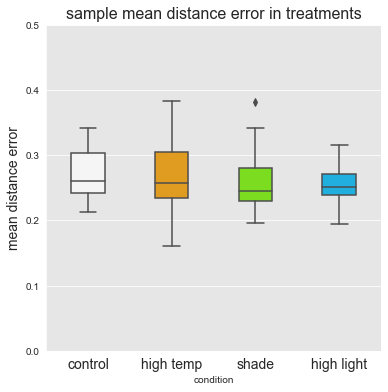

In [12]:
x = "condition"
y = "mean distance error"
sns.set_palette(sns.color_palette(colors))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

fig, ax = plt.subplots(figsize = (6,6))

ax = sns.boxplot (x = x, y = y, data = local_df, order = order, width = .4)

ax.set_title('sample mean distance error in treatments', fontsize = 16)

ax.set_ylim(0, .5)
ax.set_ylabel('mean distance error', fontsize = 14)

ax.set_xticklabels(['control','high temp','shade','high light'], fontsize = 14)


plt.show()

# fig.savefig('mean_dist.pdf')


-------

## Area test:

In [13]:
def J_for_condition(condition = 'control'):
    
    condition_J_summary = np.zeros((20,2))

    dot_folder, vein_folder, samples = get_directory(condition)
    for i, sample in enumerate(samples):

        print('Now running:', sample)

        G = graph_create.graph_creation(sample, dot_folder= dot_folder, vein_folder= vein_folder)

        seeds = [n for n in G.nodes if G.nodes[n]['type'] != 'vein']
        vor = Voronoi(seeds)
        bounded_regions = jaccard_similarity.bounded_polygons(G, vor)
        J_list = jaccard_similarity.overlap_test(G, seeds, bounded_regions)
        condition_J_summary[i][0] = J_list.mean()
        condition_J_summary[i][1] = J_list.std()

    condition_J_summary = pd.DataFrame(condition_J_summary, index = samples, columns = ['J_index_mean', 'J_index_std'])

    return condition_J_summary 

In [14]:
control_J = J_for_condition(condition = 'control')
natural_J = J_for_condition(condition = 'natural')
shade_J = J_for_condition(condition = 'shade')
heat_J =  J_for_condition(condition = 'heat')

Now running: C1-1
Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Now running: C1-2
Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Now running: C1-3
Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Now running: C1-4
Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Now running: C1-5
Creating graph from ve

In [15]:
J_summary = np.zeros((4,2)) ### will generate error since whe change shape for J_summary

J_summary[0] = control_J.mean().values
J_summary[1] = natural_J.mean().values
J_summary[2] = shade_J.mean().values
J_summary[3] = heat_J.mean().values

J_summary_df = pd.DataFrame(J_summary, columns = control_J.columns, index = ['control', 'natural', 'shade', 'heat'])

In [16]:
J_summary_df

,J_index_mean,J_index_std
control,0.687910,0.150551
natural,0.710642,0.132346
shade,0.687690,0.143926
heat,0.718834,0.120667


In [17]:
control_J['condition'] = 'control'
natural_J['condition'] = 'natural'
shade_J['condition'] = 'shade'
heat_J['condition'] = 'heat'

In [18]:
J_df = pd.concat([control_J, natural_J, shade_J, heat_J])
J_df.reset_index(level=0, inplace=True)
J_df

,index,J_index_mean,J_index_std,condition
0,C1-1,0.708892,0.124959,control
1,C1-2,0.719579,0.155494,control
2,C1-3,0.718601,0.102931,control
3,C1-4,0.699188,0.130301,control
4,C1-5,0.701537,0.133231,control
...,...,...,...,...
75,H6-1,0.756386,0.110431,heat
76,H6-3,0.757085,0.097485,heat
77,H6-4,0.744381,0.121399,heat
78,H6-5,0.751560,0.152743,heat


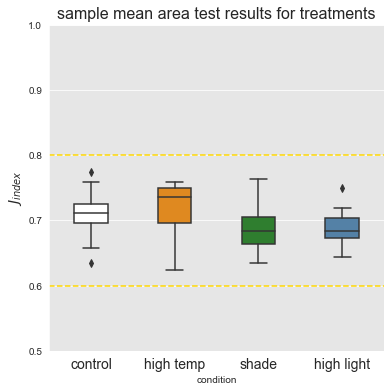

In [19]:
colors = ['white', 'darkorange', 'forestgreen', 'steelblue']


x = "condition"
y = 'J_index_mean'

sns.set_palette(sns.color_palette(colors))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

fig, ax = plt.subplots(figsize = (6,6))

ax = sns.boxplot (x = x, y = y, data = J_df, order = order, width = .4)

ax.set_title('sample mean area test results for treatments', fontsize = 16)

ax.set_ylim(0.5, 1)
ax.set_ylabel('$J_{index}$', fontsize = 14)

ax.set_xticklabels(['control','high temp','shade','high light'], fontsize = 14)

ax.axhline(.6, color = 'gold', linestyle = '--')
ax.axhline(.8, color = 'gold', linestyle = '--')

plt.show()

# fig.savefig('area_test.pdf')


----

## Explore leaf length v.s. local stats...

The question we ask is whether there is a corr. between leaf stages and the level of approximation for Voronoi.

In [21]:
length_dict = pd.read_csv('environmental/leaf_length.csv', index_col=0).to_dict()['petiole to tip']

In [22]:
length_df = pd.read_csv('environmental/leaf_length.csv')

In [23]:
control_length = control_local[['mean angle error', 'mean distance error']]
control_length['length'] = ""
for sample in control_length.index:
    control_length['length'][sample] = float(length_dict[sample])

<ipython-input-23-e2a339c0acb3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_length['length'] = ""
<ipython-input-23-e2a339c0acb3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_length['length'][sample] = float(length_dict[sample])
/Users/xinzheng/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [24]:
shade_length = shade_local[['mean angle error', 'mean distance error']]
shade_length['length'] = ""
for sample in shade_length.index:
    if sample in length_dict.keys():
        if length_dict[sample] != "/":
            shade_length['length'][sample] = float(length_dict[sample])
        else:
            shade_length = shade_length.drop(sample)
    else:
        shade_length = shade_length.drop(sample)

<ipython-input-24-0ecf111a972a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shade_length['length'] = ""
<ipython-input-24-0ecf111a972a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shade_length['length'][sample] = float(length_dict[sample])


In [25]:
natural_length = natural_local[['mean angle error', 'mean distance error']]
natural_length['length'] = ""
for sample in natural_length.index:
    if sample in length_dict.keys():
        if length_dict[sample] != "/":
            natural_length['length'][sample] = float(length_dict[sample])
        else:
            natural_length = natural_length.drop(sample)
    else:
        natural_length = natural_length.drop(sample)

<ipython-input-25-ef4f2b22bffa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  natural_length['length'] = ""
<ipython-input-25-ef4f2b22bffa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  natural_length['length'][sample] = float(length_dict[sample])


In [26]:
heat_length = heat_local[['mean angle error', 'mean distance error']]
heat_length['length'] = ""
for sample in heat_length.index:
    if sample in length_dict.keys():
        if length_dict[sample] != "/":
            heat_length['length'][sample] = float(length_dict[sample])
        else:
            heat_length = heat_length.drop(sample)
    else:
        heat_length = heat_length.drop(sample)

<ipython-input-26-7d67aacc5f8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heat_length['length'] = ""
<ipython-input-26-7d67aacc5f8d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heat_length['length'][sample] = float(length_dict[sample])


In [27]:
shade_length

,mean angle error,mean distance error,length
S1-1,9.610948,0.381695,752.471
S1-2,9.181176,0.259889,1312.81
S1-3,8.075943,0.197541,1626.26
S1-5,7.857748,0.276959,1680.33
S2-4,9.570163,0.302249,1610.19
S2-5,9.960831,0.236076,1845.12
S2-6,8.380337,0.231838,1649.76
S3-2,8.376622,0.233868,1290.87
S3-4,8.030972,0.239657,1489.03
S4-4,8.663980,0.289773,1236.93


In [28]:
control_length

,mean angle error,mean distance error,length
C1-1,10.060697,0.249191,882.96
C1-2,9.646874,0.224596,1162.7
C1-3,9.722104,0.242157,1305.69
C1-4,9.112837,0.194321,1433.48
C1-5,9.651382,0.242173,1316.06
C2-1,10.629277,0.270683,554.979
C2-2,10.320455,0.266169,1172.94
C2-3,8.810737,0.315405,1342.99
C2-5,9.529345,0.263129,1388.33
C3-1,11.416090,0.253534,487.543


In [30]:
conditions = [natural_length, heat_length, shade_length, control_length]

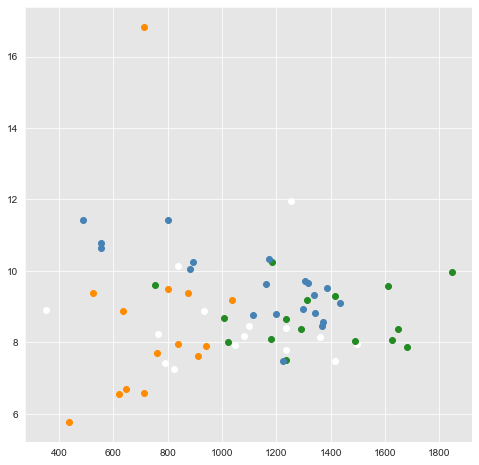

In [41]:
fix, ax = plt.subplots(figsize = (8, 8))

for i, condtion_len in enumerate(conditions):
    ax.scatter(condtion_len['length'], condtion_len['mean angle error'])
plt.show()


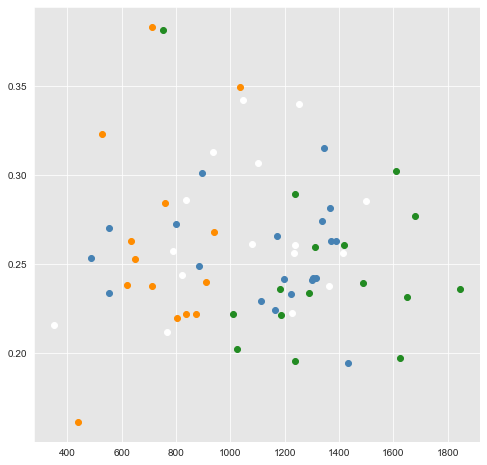

In [42]:
fix, ax = plt.subplots(figsize = (8, 8))

for i, condtion_len in enumerate(conditions):
    ax.scatter(condtion_len['length'], condtion_len['mean distance error'])
plt.show()


#### Plot angle error one by one...

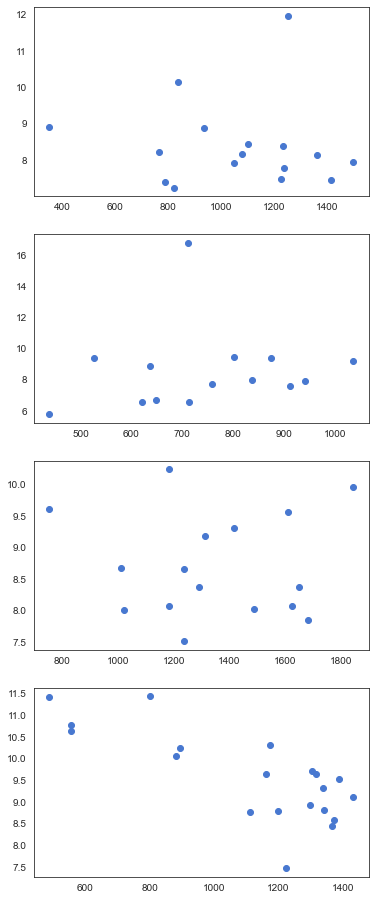

In [48]:
sns.set_palette('muted')

fix, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (6, 16))

for i, condtion_len in enumerate(conditions):
    ax[i].scatter(condtion_len['length'], condtion_len['mean angle error'])
plt.show()


#### Plot distance error one by one...

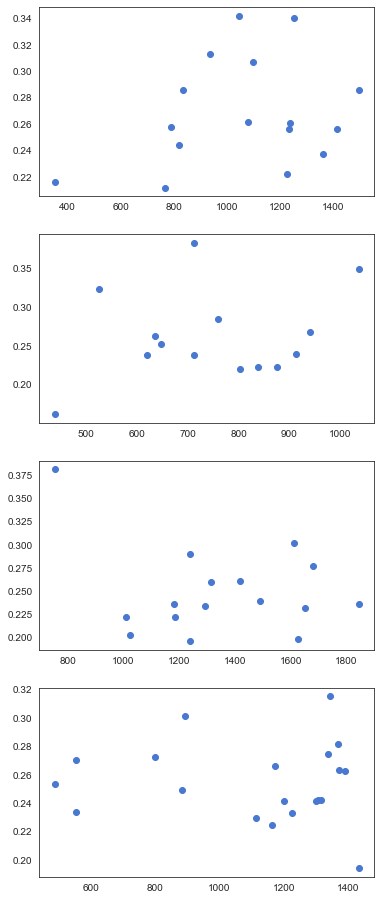

In [50]:
sns.set_palette('muted')

fix, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (6, 16))

for i, condtion_len in enumerate(conditions):
    ax[i].scatter(condtion_len['length'], condtion_len['mean distance error'])
plt.show()


### Plot control angle error regression...

In [46]:
def plot_ci_manual(t, s_err, n, x, x2, y2, ax=None):
    """Return an axes of confidence bands using a simple approach.
    
    Notes
    -----
    .. math:: \left| \: \hat{\mu}_{y|x0} - \mu_{y|x0} \: \right| \; \leq \; T_{n-2}^{.975} \; \hat{\sigma} \; \sqrt{\frac{1}{n}+\frac{(x_0-\bar{x})^2}{\sum_{i=1}^n{(x_i-\bar{x})^2}}}
    .. math:: \hat{\sigma} = \sqrt{\sum_{i=1}^n{\frac{(y_i-\hat{y})^2}{n-2}}}
    
    References
    ----------
    .. [1] M. Duarte.  "Curve fitting," Jupyter Notebook.
       http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/CurveFitting.ipynb
    
    """
    if ax is None:
        ax = plt.gca()
    
    ci = t * s_err * np.sqrt(1/n + (x2 - np.mean(x))**2 / np.sum((x - np.mean(x))**2))
    ax.fill_between(x2, y2 + ci, y2 - ci,  color="#b9cfe7")

    return ax


def plot_ci_bootstrap(xs, ys, resid, nboot=500, ax=None):
    """Return an axes of confidence bands using a bootstrap approach.

    Notes
    -----
    The bootstrap approach iteratively resampling residuals.
    It plots `nboot` number of straight lines and outlines the shape of a band.
    The density of overlapping lines indicates improved confidence.

    Returns
    -------
    ax : axes
        - Cluster of lines
        - Upper and Lower bounds (high and low) (optional)  Note: sensitive to outliers

    References
    ----------
    .. [1] J. Stults. "Visualizing Confidence Intervals", Various Consequences.
       http://www.variousconsequences.com/2010/02/visualizing-confidence-intervals.html

    """ 
    if ax is None:
        ax = plt.gca()

    bootindex = sp.random.randint

    for _ in range(nboot):
        resamp_resid = resid[bootindex(0, len(resid) - 1, len(resid))]
        # Make coeffs of for polys
        pc = sp.polyfit(xs, ys + resamp_resid, 1)                   
        # Plot bootstrap cluster
        ax.plot(xs, sp.polyval(pc, xs), "b-", linewidth=2, alpha=3.0 / float(nboot))

    return ax

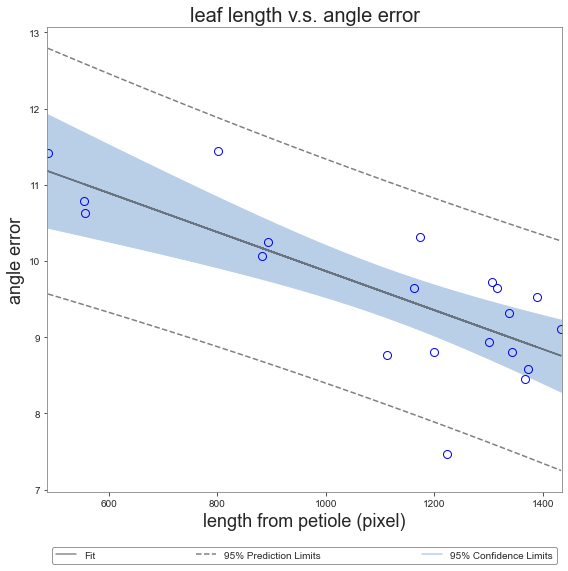

In [47]:
sns.set_style("white")

# Computations ----------------------------------------------------------------    
x = control_length['length'].astype('float64')
y = control_length['mean angle error'].astype('float64')

# Modeling with Numpy
def equation(a, b):
    """Return a 1D polynomial."""
    return np.polyval(a, b) 

p, cov = np.polyfit(x, y, 1, cov=True)                     # parameters and covariance from of the fit of 1-D polynom.
y_model = equation(p, x)                                   # model using the fit parameters; NOTE: parameters here are coefficients

# Statistics
n = y.size                                           # number of observations
m = p.size                                                 # number of parameters
dof = n - m                                                # degrees of freedom
t = stats.t.ppf(0.975, n - m)                              # used for CI and PI bands

# Estimates of Error in Data/Model
resid = y - y_model                           
chi2 = np.sum((resid / y_model)**2)                        # chi-squared; estimates error in data
chi2_red = chi2 / dof                                      # reduced chi-squared; measures goodness of fit
s_err = np.sqrt(np.sum(resid**2) / dof)                    # standard deviation of the error

# Plotting --------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 8))

# Data
ax.plot(
    x, y, "o", color="#b9cfe7", markersize=8, 
    markeredgewidth=1, markeredgecolor="b", markerfacecolor="None"
)

# Fit
ax.plot(x, y_model, "-", color="0.1", linewidth=1.5, alpha=0.5, label="Fit")  

x2 = np.linspace(np.min(x), np.max(x), 100)
y2 = equation(p, x2)

# Confidence Interval (select one)
plot_ci_manual(t, s_err, n, x, x2, y2, ax=ax)
#plot_ci_bootstrap(x, y, resid, ax=ax)
   
# Prediction Interval
pi = t * s_err * np.sqrt(1 + 1/n + (x2 - np.mean(x))**2 / np.sum((x - np.mean(x))**2))   
ax.fill_between(x2, y2 + pi, y2 - pi, color="None", linestyle="--")
ax.plot(x2, y2 - pi, "--", color="0.5", label="95% Prediction Limits")
ax.plot(x2, y2 + pi, "--", color="0.5")

# Figure Modifications --------------------------------------------------------
# Borders
ax.spines["top"].set_color("0.5")
ax.spines["bottom"].set_color("0.5")
ax.spines["left"].set_color("0.5")
ax.spines["right"].set_color("0.5")
ax.get_xaxis().set_tick_params(direction="out")
ax.get_yaxis().set_tick_params(direction="out")
ax.xaxis.tick_bottom()
ax.yaxis.tick_left() 

# Labels
plt.title("leaf length v.s. angle error", fontsize=20)
plt.xlabel("length from petiole (pixel)", fontsize =18)
plt.ylabel("angle error", fontsize =18)
plt.xlim(np.min(x) - 1, np.max(x) + 1)

# Custom legend
handles, labels = ax.get_legend_handles_labels()
display = (0, 1)
anyArtist = plt.Line2D((0, 1), (0, 0), color="#b9cfe7")    # create custom artists
legend = plt.legend(
    [handle for i, handle in enumerate(handles) if i in display] + [anyArtist],
    [label for i, label in enumerate(labels) if i in display] + ["95% Confidence Limits"],
    loc=9, bbox_to_anchor=(0, -0.21, 1., 0.102), ncol=3, mode="expand"
)  
frame = legend.get_frame().set_edgecolor("0.5")

# Save Figure
plt.tight_layout()
plt.savefig("length_error_reg.pdf")

plt.show()